In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import os
import matplotlib.pyplot as plt

In [2]:
start_year = 2012
end_year = 2016
start = pd.datetime(start_year, 1, 1)
end = pd.datetime(end_year, 12, 31)
code = 'AJL.AX'
code_dat = web.DataReader(code, 'yahoo', start, end)

In [3]:
rolling = code_dat.rolling(window=14)

In [4]:
close_price = code_dat.loc[:, 'Close']

In [7]:
hi = rolling['High'].max()
lo = rolling['Low'].min()

In [8]:
kperc = 100 * (close_price - lo) / (hi - lo)

In [9]:
dperc = kperc.rolling(window=3).mean()

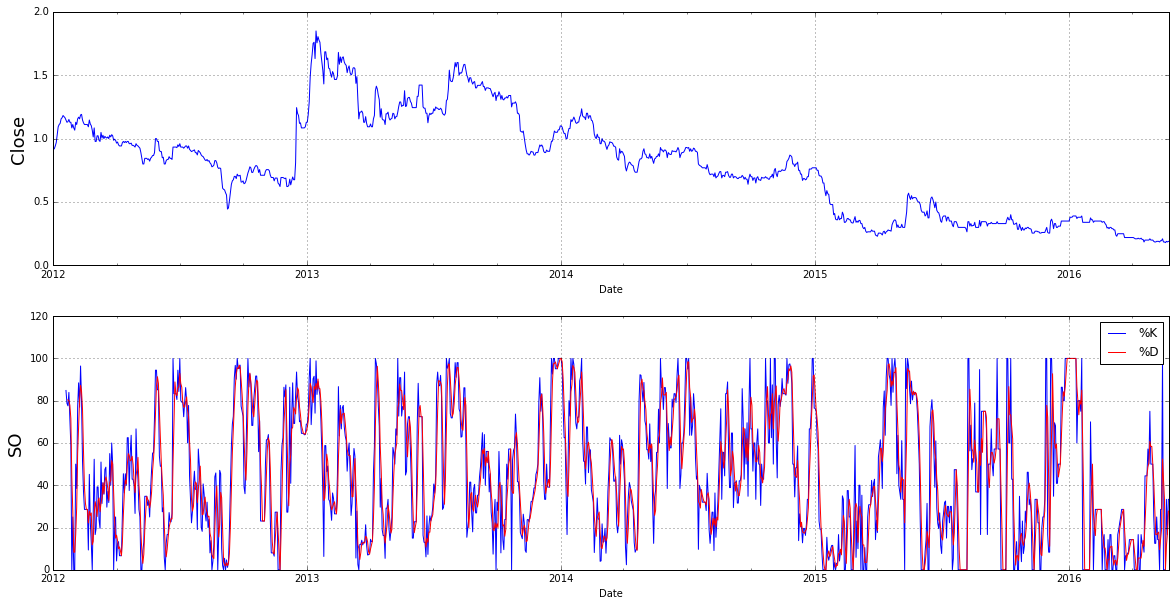

In [11]:
plt.figure(figsize=(20, 10))
ax_up = plt.subplot(211)
close_price.plot(ax=ax_up)
ax_up.set_ylabel('Close', fontsize=18)
plt.grid()
ax_down = plt.subplot(212)
kperc.plot(ax=ax_down, label='%K')
dperc.plot(ax=ax_down, label='%D', color='r')
ax_down.set_ylabel('SO', fontsize=18)
plt.grid()
plt.legend()